In [1]:
from matplotlib import pyplot as plt
from PIL import Image as im
import numpy as np
import math

In [2]:
def convolution(img, filt_size):
    shape = img.shape
    if len(shape)==2:
        newimg = np.full((shape[0]-(filt_size - 1), shape[1] - (filt_size - 1)), 0)
        filt = np.random.randint(-9, 10, (filt_size, filt_size))

        for i in range(shape[0]-filt_size+1):
            for j in range(shape[1]-filt_size+1):
                temp = img[i:i+filt_size,j:j+filt_size]
                newimg[i,j] = np.sum(np.multiply(temp, filt))
    else:
        newimg = np.full((shape[0]-(filt_size - 1), shape[1] - (filt_size - 1), shape[2]), 0)
        filt = np.random.randint(-9, 10, (filt_size, filt_size))

        for i in range(shape[0]-filt_size+1):
            for j in range(shape[1]-filt_size+1):
                for k in range(shape[2]):
                    temp = img[i:i+filt_size,j:j+filt_size,k]
                    newimg[i,j,k] = np.sum(np.multiply(temp, filt))
    
    return newimg

In [3]:
def relu(img):
    shape = img.shape
    if len(shape)==2:
        newimg = np.full((shape[0], shape[1]))
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                newimg[i, j] = np.max([0, img[i, j]])
    else:
        newimg = np.zeros((shape[0], shape[1], shape[2]))
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(shape[2]):
                    newimg[i, j, k] = np.max([0, img[i, j, k]])
    
    return newimg

In [4]:
def maxPooling(img, pool_size):
    shape = img.shape
    if len(shape)==2:
        newimg = np.full((math.ceil(shape[0]/pool_size), math.ceil(shape[1]/pool_size)))

        for i,m in zip(range(0, shape[0], pool_size), range(round(shape[0]/pool_size))):
            for j,n in zip(range(0, shape[1], pool_size), range(round(shape[1]/pool_size))):
                newimg[m, n] = np.max(img[i:i+pool_size, j:j+pool_size])
    else:
        newimg = np.zeros((math.ceil(shape[0]/pool_size), math.ceil(shape[1]/pool_size), shape[2]))

        for i,m in zip(range(0, shape[0], pool_size), range(round(shape[0]/pool_size))):
            for j,n in zip(range(0, shape[1], pool_size), range(round(shape[1]/pool_size))):
                for k in range(shape[2]):
                    newimg[m, n, k] = np.max(img[i:i+pool_size, j:j+pool_size, k])
    
    return newimg

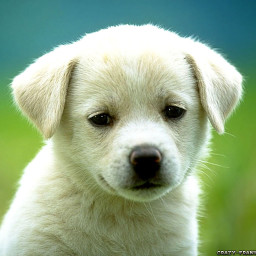

In [5]:
image = im.open('dog.jpg')
image

In [6]:
img = np.array(image)

In [7]:
conv = convolution(img, filt_size=3)

In [8]:
print(np.max(conv))
print(np.min(conv))

4911
-1111


In [9]:
rel = relu(conv)

In [10]:
print(np.max(rel))
print(np.min(rel))

4911.0
0.0


In [11]:
pool = maxPooling(rel, 2)

In [12]:
print(np.max(pool))
print(np.min(pool))

4911.0
0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


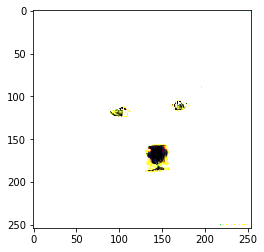

In [13]:
plt.imshow(conv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


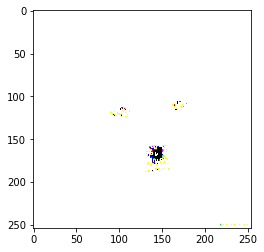

In [14]:
plt.imshow(rel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


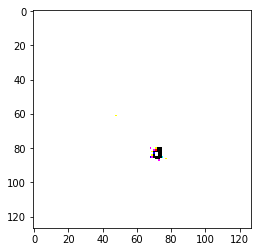

In [15]:
plt.imshow(pool)